In [1]:
import pandas as pd
df1=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [3]:
df2 =  df1['genres'].str.split(',')
df2.head()

0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

In [4]:
df3=df1.join(df2, how='outer', lsuffix= '_og')
df3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres_og,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [5]:
df3.drop(['original_title', 'genres_og'], axis =1, inplace=True)
df3.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]"


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [7]:
# df3 is now ready to combine with other data. So I will import the next dataset.

In [8]:
df4=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df4.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
df5 = df3.merge(df4, how = 'inner', on = 'tconst')

In [11]:
df5.head()


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119


In [12]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [13]:
#ok so thats looking pretty good now for the 3rd data set

In [14]:
df6=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df6.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
pd.to_numeric(df6['foreign_gross'], errors = 'coerce')

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [17]:
df6['foreigngross'] = df6.fillna(0)['foreign_gross']
df6.head()

,title,studio,domestic_gross,foreign_gross,year,foreigngross
0,Toy Story 3,BV,415000000.0,652000000,2010,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,664300000
3,Inception,WB,292600000.0,535700000,2010,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,513900000


In [18]:
df6['foreign_gross'] = df6['foreign_gross'].str.replace(',' , '')
df6.head()

,title,studio,domestic_gross,foreign_gross,year,foreigngross
0,Toy Story 3,BV,415000000.0,652000000,2010,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,664300000
3,Inception,WB,292600000.0,535700000,2010,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,513900000


In [19]:
print(df6[df6['foreign_gross'].isnull()])

                                       title      studio  domestic_gross  \
222                                  Flipped          WB       1800000.0   
254   The Polar Express (IMAX re-issue 2010)          WB        673000.0   
267                           Tiny Furniture         IFC        392000.0   
269            Grease (Sing-a-Long re-issue)        Par.        366000.0   
280                          Last Train Home       Zeit.        288000.0   
...                                      ...         ...             ...   
3382                               The Quake       Magn.          6200.0   
3383             Edward II (2018 re-release)          FM          4800.0   
3384                                El Pacto        Sony          2500.0   
3385                                The Swan  Synergetic          2400.0   
3386                       An Actor Prepares       Grav.          1700.0   

     foreign_gross  year foreigngross  
222            NaN  2010            0  
254    

In [20]:
df6['foreign_gross'] = df6['foreign_gross'].fillna(0)

In [21]:
df6['foreign_gross'] = df6['foreign_gross'].astype(float).astype(int)

In [22]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   int32  
 4   year            3387 non-null   int64  
 5   foreigngross    3387 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 145.7+ KB


In [23]:
df6['total_revenue'] = df6['domestic_gross'] + df6['foreign_gross']

###### it finally worked!!

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   int32  
 4   year            3387 non-null   int64  
 5   foreigngross    3387 non-null   object 
 6   total_revenue   3359 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 172.1+ KB


In [25]:
df6.head()

,title,studio,domestic_gross,foreign_gross,year,foreigngross,total_revenue
0,Toy Story 3,BV,415000000.0,652000000,2010,652000000,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,691300000,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,664300000,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,535700000,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,513900000,7.526000e+08


In [26]:
df6.drop(['domestic_gross', 'foreign_gross', 'year', 'foreigngross'], axis =1, inplace=True)
df6.head()

,title,studio,total_revenue
0,Toy Story 3,BV,1.067000e+09
1,Alice in Wonderland (2010),BV,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
3,Inception,WB,8.283000e+08
4,Shrek Forever After,P/DW,7.526000e+08


In [27]:
df5.rename(columns={'primary_title' : 'title'}, inplace=True)
df5.head()

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119


In [28]:
all_data = df5.merge(df6, how = 'inner', on = 'title')
all_data.head()

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,total_revenue
0,tt0315642,Wazir,2016,103.0,"[Action, Crime, Drama]",7.1,15378,Relbig.,1100000.0
1,tt0337692,On the Road,2012,124.0,"[Adventure, Drama, Romance]",6.1,37886,IFC,8744000.0
2,tt4339118,On the Road,2014,89.0,[Drama],6.0,6,IFC,8744000.0
3,tt5647250,On the Road,2016,121.0,[Drama],5.7,127,IFC,8744000.0
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,Fox,188100000.0


In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   start_year       3027 non-null   int64  
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   int64  
 7   studio           3024 non-null   object 
 8   total_revenue    3005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 213.0+ KB


In [30]:
genre_groups= all_data.explode('genres')

In [31]:
genre_groups['genres'].astype(str)

0            Action
0             Crime
0             Drama
1         Adventure
1             Drama
           ...     
3024          Drama
3025          Drama
3025        Romance
3026    Documentary
3026          Music
Name: genres, Length: 6985, dtype: object

In [32]:
gg = genre_groups.groupby('genres')


In [33]:
gg.first()

,tconst,title,start_year,runtime_minutes,averagerating,numvotes,studio,total_revenue
genres,,,,,,,,
Action,tt0315642,Wazir,2016,103.0,7.1,15378,Relbig.,1100000.0
Adventure,tt0337692,On the Road,2012,124.0,6.1,37886,IFC,8744000.0
Animation,tt0398286,Tangled,2010,100.0,7.8,366366,BV,591800000.0
Biography,tt0420293,The Stanford Prison Experiment,2015,122.0,6.9,32591,IFC,661000.0
Comedy,tt0359950,The Secret Life of Walter Mitty,2013,114.0,7.3,275300,Fox,188100000.0
Crime,tt0315642,Wazir,2016,103.0,7.1,15378,Relbig.,1100000.0
Documentary,tt4453750,Before We Go,2014,84.0,7.0,22,RTWC,37200.0
Drama,tt0315642,Wazir,2016,103.0,7.1,15378,Relbig.,1100000.0
Family,tt0383010,The Three Stooges,2012,92.0,5.1,28570,Fox,54800000.0


In [34]:
gg.get_group('Mystery')

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,total_revenue
16,tt0419692,Disconnect,2010,112.0,Mystery,4.5,190,LD,1400000.0
22,tt0431021,The Possession,2012,92.0,Mystery,5.9,53649,LGF,85400000.0
45,tt0470752,Ex Machina,2014,108.0,Mystery,7.7,424542,A24,36800000.0
55,tt0477302,Extremely Loud & Incredibly Close,2011,129.0,Mystery,6.9,93164,WB,55200000.0
70,tt0498381,Rings,2017,102.0,Mystery,4.5,34151,Par.,83100000.0
...,...,...,...,...,...,...,...,...,...
2991,tt7282468,Burning,2018,148.0,Mystery,7.6,22671,WGUSA,719000.0
3004,tt7668870,Searching,2018,102.0,Mystery,7.7,97991,SGem,75400000.0
3008,tt7752454,Detective Chinatown 2,2018,121.0,Mystery,6.1,1250,WB,544100000.0
3010,tt7784604,Hereditary,2018,127.0,Mystery,7.3,151571,A24,79400000.0


In [35]:
import matplotlib.pyplot as plt

In [36]:
genre_groups.head()

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,total_revenue
0,tt0315642,Wazir,2016,103.0,Action,7.1,15378,Relbig.,1100000.0
0,tt0315642,Wazir,2016,103.0,Crime,7.1,15378,Relbig.,1100000.0
0,tt0315642,Wazir,2016,103.0,Drama,7.1,15378,Relbig.,1100000.0
1,tt0337692,On the Road,2012,124.0,Adventure,6.1,37886,IFC,8744000.0
1,tt0337692,On the Road,2012,124.0,Drama,6.1,37886,IFC,8744000.0


In [37]:
genre_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           6985 non-null   object 
 1   title            6985 non-null   object 
 2   start_year       6985 non-null   int64  
 3   runtime_minutes  6920 non-null   float64
 4   genres           6978 non-null   object 
 5   averagerating    6985 non-null   float64
 6   numvotes         6985 non-null   int64  
 7   studio           6979 non-null   object 
 8   total_revenue    6935 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 545.7+ KB


In [38]:
genre_groups.drop ([ 'tconst', 'title', 'start_year', 'runtime_minutes', 'numvotes', 'studio', 'averagerating'], axis =1, inplace = True)

In [39]:
genre_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6985 entries, 0 to 3026
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         6978 non-null   object 
 1   total_revenue  6935 non-null   float64
dtypes: float64(1), object(1)
memory usage: 163.7+ KB


In [40]:
gg = genre_groups.groupby(['genres']).median()

In [41]:
gg.head(20)

,total_revenue
genres,
Action,55000000.0
Adventure,149900000.0
Animation,120900000.0
Biography,5700000.0
Comedy,12859000.0
Crime,9618000.0
Documentary,613500.0
Drama,3400000.0
Family,45250000.0


In [42]:
gg.plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x000001F5CAB6A050>>

In [43]:
gg.reset_index()

,genres,total_revenue
0,Action,55000000.0
1,Adventure,149900000.0
2,Animation,120900000.0
3,Biography,5700000.0
4,Comedy,12859000.0
5,Crime,9618000.0
6,Documentary,613500.0
7,Drama,3400000.0
8,Family,45250000.0
9,Fantasy,47300000.0


In [44]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Action to Western
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_revenue  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0+ bytes


In [45]:
gg['genres'] = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 
                'Scif-Fi', 'Sport', 'Thriller', 'War', 'Western' ]
gg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Action to Western
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_revenue  22 non-null     float64
 1   genres         22 non-null     object 
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


<Axes: xlabel='genres'>

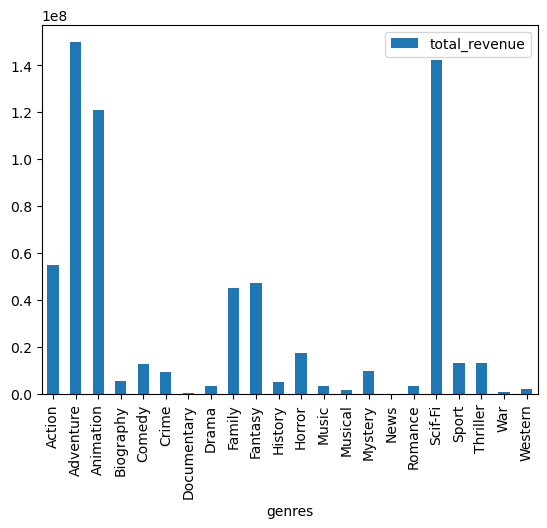

In [46]:
gg.plot.bar('genres', 'total_revenue')

In [47]:
#Now to make other conclusions and circle back and make that pretty later

In [48]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   start_year       3027 non-null   int64  
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   int64  
 7   studio           3024 non-null   object 
 8   total_revenue    3005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 213.0+ KB


In [49]:
studios = all_data.copy(deep=True)

In [50]:
studios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   start_year       3027 non-null   int64  
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   int64  
 7   studio           3024 non-null   object 
 8   total_revenue    3005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 213.0+ KB


In [51]:
studios.drop(['tconst', 'title', 'start_year', 'runtime_minutes', 'genres', 'numvotes' ], axis = 1, inplace = True)
studios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  3027 non-null   float64
 1   studio         3024 non-null   object 
 2   total_revenue  3005 non-null   float64
dtypes: float64(2), object(1)
memory usage: 71.1+ KB


In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   start_year       3027 non-null   int64  
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   int64  
 7   studio           3024 non-null   object 
 8   total_revenue    3005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 213.0+ KB


In [53]:
studios_rating = studios.copy(deep=True)

In [54]:
studios_rating.drop(['total_revenue'], axis = 1, inplace = True)
studios_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  3027 non-null   float64
 1   studio         3024 non-null   object 
dtypes: float64(1), object(1)
memory usage: 47.4+ KB


In [55]:
sr = studios_rating.groupby(['studio']).median().sort_values(['averagerating'], ascending= False).head(20)

sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Trafalgar to NGE
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [56]:
sr.head()

,averagerating
studio,
Trafalgar,8.8
NAV,8.7
GrtIndia,8.3
SHO,8.2
Pala.,8.1


In [57]:
sr['studio'] = ['Trafalgar', 'NAv', 'GrtIndia', 'SHO', 'Pala.', 'BSC', 'PDA', 
                      'UTMW', 'App.', 'Good Deed', 'Abr.', 'WOW', 'Elev.', 'MUBI', 
                      'RME', 'U/P', 'SD', 'BWP', 'BBC', 'NGE']
sr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Trafalgar to NGE
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  20 non-null     float64
 1   studio         20 non-null     object 
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [58]:
sr.head(20)

,averagerating,studio
studio,,
Trafalgar,8.80,Trafalgar
NAV,8.70,NAv
GrtIndia,8.30,GrtIndia
SHO,8.20,SHO
Pala.,8.10,Pala.
BSC,8.10,BSC
PDA,8.00,PDA
UTMW,8.00,UTMW
App.,7.90,App.


<Axes: xlabel='studio'>

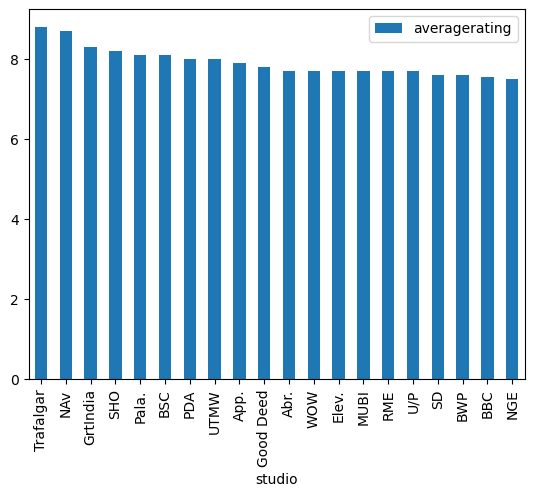

In [59]:
sr.plot.bar('studio', 'averagerating')

In [60]:
studios_revenue = studios.copy(deep=True)

In [61]:
studios_revenue.drop(['averagerating'], axis = 1, inplace = True)
studios_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   studio         3024 non-null   object 
 1   total_revenue  3005 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.4+ KB


In [62]:
sm = studios_revenue.groupby(['studio']).median().sort_values(['total_revenue'], ascending= False).head(20)

sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, HC to LGF
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_revenue  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


In [63]:
sm.head(20)

,total_revenue
studio,
HC,870300000.0
P/DW,524950000.0
BV,260500000.0
GrtIndia,254200000.0
Sony,148600000.0
WB (NL),145450000.0
Fox,144900000.0
MGM,139300000.0
Uni.,135900000.0


In [64]:
sm['studio'] = ['HC', 'P/DW', 'BV', 'GrtIndia', 'Sony', 'WB(NL)', 'Fox', 'MGM', 
                'Uni', 'WAMCR', 'Par.', 'WB', 'Studio 8', 'LG/S', 'SGem', 'TriS', 'STX',
               'Sum', 'AR', 'LGF']
sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, HC to LGF
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_revenue  20 non-null     float64
 1   studio         20 non-null     object 
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [65]:
sm.head(20)

,total_revenue,studio
studio,,
HC,870300000.0,HC
P/DW,524950000.0,P/DW
BV,260500000.0,BV
GrtIndia,254200000.0,GrtIndia
Sony,148600000.0,Sony
WB (NL),145450000.0,WB(NL)
Fox,144900000.0,Fox
MGM,139300000.0,MGM
Uni.,135900000.0,Uni


<Axes: xlabel='studio'>

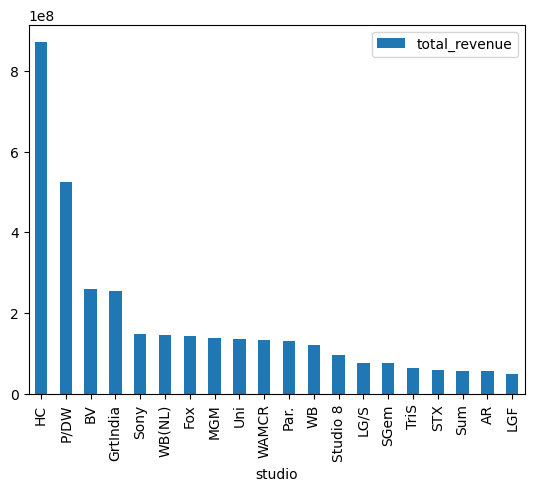

In [66]:
sm.plot.bar('studio', 'total_revenue')

In [67]:
# now for the last conclusion


In [69]:
runtime_conc = all_data.copy(deep=True)
runtime_conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   start_year       3027 non-null   int64  
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   int64  
 7   studio           3024 non-null   object 
 8   total_revenue    3005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 213.0+ KB


In [71]:
runtime_conc.drop(['tconst', 'title', 'start_year', 'studio', 'genres', 'numvotes' ], axis = 1, inplace = True)
runtime_conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  2980 non-null   float64
 1   averagerating    3027 non-null   float64
 2   total_revenue    3005 non-null   float64
dtypes: float64(3)
memory usage: 71.1 KB


In [74]:
runtime_conc['runtime_minutes'].corrwith(runtime_conc['averagerating']

SyntaxError: incomplete input (3588408076.py, line 1)

In [76]:
print(runtime_conc['runtime_minutes'].corr(runtime_conc['averagerating']))
print(runtime_conc['runtime_minutes'].corr(runtime_conc['total_revenue']))

0.15112462954554193
0.14949065557391722


<Axes: xlabel='runtime_minutes', ylabel='averagerating'>

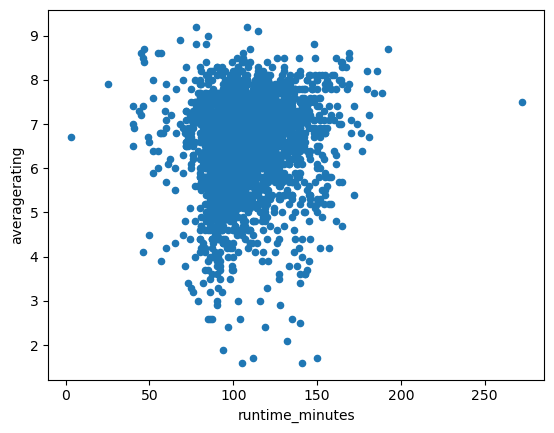

In [79]:
runtime_conc.plot.scatter('runtime_minutes', 'averagerating')

<Axes: xlabel='runtime_minutes', ylabel='total_revenue'>

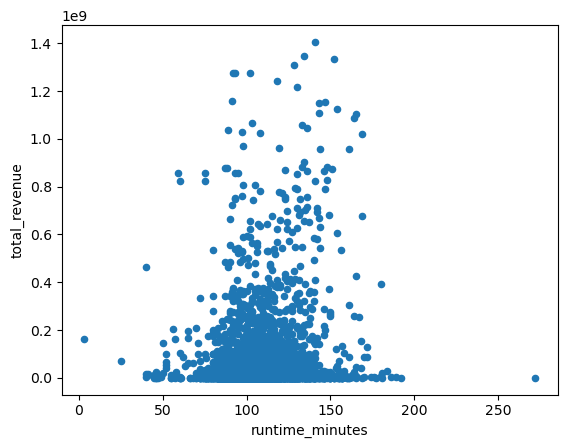

In [80]:
runtime_conc.plot.scatter('runtime_minutes', 'total_revenue')

In [ ]:
# so there is no correlation between the runtime and the success of a movie